# 파이썬 네트워크 모듈

- 네트워크 프로그램은 인터넷으로 연결된 컴퓨터(또는 통신 장치) 사이에 데이터를 송수신하는 프로그램이다
- 파이썬 네트워크 모듈을 이용하면 네트워크 프로그램을 작성할 수 있다
- 네트워크 프로그래밍을 위한 파이썬 모듈   
>ipaddress – IP 주소와 관련 정보를 표현하는 모듈  
socket – 데이터 송수신을 위한 기본 통신 모듈  
select – 입출력 모니터링 모듈  
selectors – 효율적인 입출력 다중화를 위한 모듈  
socketserver - 네트워크 서버를 작성하기 위한 모듈  
asyncio – 비동기 입출력 모듈  
urllib – URL 관련 프로그래밍 모듈  
http – HTTP 프로토콜을 이용한 프로그래밍 모듈  

## ipaddress 모듈  
IP 주소를 표현하고 처리하기 위해 ipaddress 모듈이 사용된다. ipaddress 모듈을 이용한 호스트 주소 생성과 속성에 대해 알아본다

### IP 주소  
- 인터넷에서는 호스트(컴퓨터)를 식별하기 위해 IP 주소를 사용  
  IP 주소는 네트워크 영역과 호스트 영역으로 구분  
- IP 주소 표현 방법
  * 클래스(class) 방식: 주소 클래스에 따라 네트워크 영역과 호스트 영역이 미리 정해져 있음
    + 192.168.100.10(클래스 C), subnet mask(255.255.255.0)로 영역 표시  
  * CIDR(Classless Inter-Domain Routing) 표기법: 클래스 구분없이 IP주소/네트워크 주소 자리 수로 표현  
    + 192.168.100.10/24: IP 주소 중에서 선행 24비트는 네트워크 주소, 나머지는 호스트 주소
- IP 주소를 표현하고 처리하기 위해 ipaddress 모듈 사용  
import ipaddress  
ipaddress의 주요 메서드
>ip_address() # 호스트 주소  
>ip_network() # 네트워크 주소  
>ip_interface # 인터페이스 주소  

### ipaddress가 표현하는 IP 주소  의 종류

- 호스트 주소: IPv4Address, IPv6Address
> 호스트를 식별하기 위한 주소  
> IPv4 호스트 주소: 192.168.100.5
- 네트워크 주소: IPv4Network, IPv6Network  
> 인터넷에서 네트워크를 식별하기 위한 주소  
> IPv4 네트워크 주소: 192.168.100.0/24, 호스트 부분은 0
- 인터페이스 주소  
> 네트워크 인터페이스(입구) 역할을 하는 방화벽이나 라우터 주소  
> IPv4 인터페이스 주소: 192.168.100.10/24

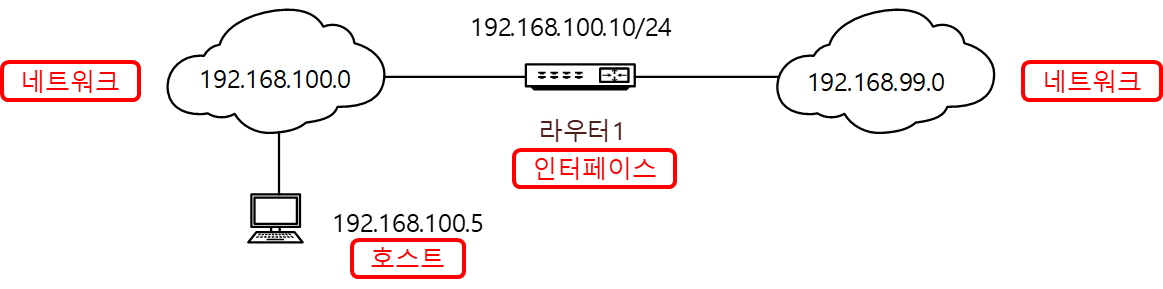

## IP 주소 생성
- ip_address(addr) 함수를 사용하여 호스트 IP 주소를 나타내는 객체(주소객체)를 생성한다  
- 주소 객체의 메서드와 속성을 이용하여 주소에 대한 정보를 알 수 있다  

#### 호스트 주소 객체의 생성
- 문자열을 이용한 주소 객체 생성
- 문자열 주소에 따라 버전 자동 결정

In [ ]:
import ipaddress
ipaddress.ip_address('192.0.0.1')

In [ ]:
ipaddress.ip_address('2001:DB8::1')

- 정수를 이용한 주소 객체 생성

In [ ]:
ipaddress.ip_address(3221225985)

In [ ]:
ipaddress.ip_address(42540766411282592856903984951653826561)

## IP 주소 객체 속성
* 주소 객체 속성은 주소와 관련된 정보를 나타낸다  
* IP 주소 객체 속성  
    >is_multicast    멀티캐스트 주소?  
    >is_private      사설망 주소?  
    >is_global 공중망 주소?  
    >is_unspecified 주소 용도가 지정되지 않았는가?  
    >is_reserved 유보된 주소?  
    >is_loopback 루프백 주소?. 127.0.0.1  
    >version IP 주소 객체의 version  

In [ ]:
# ipaddress 모듈의 속성 조사 프로그램 1
import ipaddress

#주소 객체 생성
addr = ipaddress.ip_address('192.168.0.15')

#주소 객체 속성 조사
print(f'IP Version: {addr.version}')
print(f'{addr} is Private? {addr.is_private}')
print(f'{addr} is Loopback Addr? {addr.is_loopback}')
addr2 = ipaddress.ip_address('127.0.0.1')
print(f'{addr2} is Loopback Addr? {addr2.is_loopback}')

IP 주소를 16진수로 나타내기
+ 문자열 주소 → 바이트로 변환: 주소객체.packed 사용
+ 바이트 주소 → 바이트열로 변환: binascii.hexlify(바이트 주소) 사용

In [ ]:
import ipaddress
import binascii

addr = ipaddress.ip_address('192.168.0.15')

# IP주소를 바이트로 나타내기
p_addr = addr.packed 
print(f'IP 주소: {addr}, 바이트 표현 IP 주소{p_addr}')

# 바이트열로 표현
print(binascii.hexlify(p_addr)) 

In [ ]:
type(addr.packed)

In [ ]:
# ipaddress 모듈의 속성 조사 프로그램 2

import binascii
import ipaddress

ADDRESSES =[
    '192.168.0.5',
    '2001:0:9d38:6abd:480:f1f:3f57:fffb',
]

In [ ]:
#주소 객체의 속성 조사
for ipaddr in ADDRESSES :
    addr =ipaddress.ip_address(ipaddr)
    print(f'IP address: {addr!r}') #IP 주소
    print('IP version:',addr.version) #버전
    print('Packed addr:',binascii.hexlify(addr.packed)) #압축 바이너리 주소
    print('Integer addr:',int(addr)) #정수형 주소(32비트를 정수로 표현)
    print('Is private?:',addr.is_private) #사설망 조사
    print()

# socket 모듈

## socket이란?
+ 소켓은 통신 채널의 종단점(end point)이다  
   + 호스트 - (소켓 - 네트워크 - 소켓) - 호스트  
   + 프로그램은 소켓을 통해 상대방과 연결된다
   + 통신을 위해서 프로그램은 소켓에 접속해야 한다  
   
+ socket 모듈은 소켓을 만들고 데이터를 송수신할 수 있는 메서드를 제공한다  
   + 네트워크 프로그램은 socket 모듈을 사용하여 작성된다  
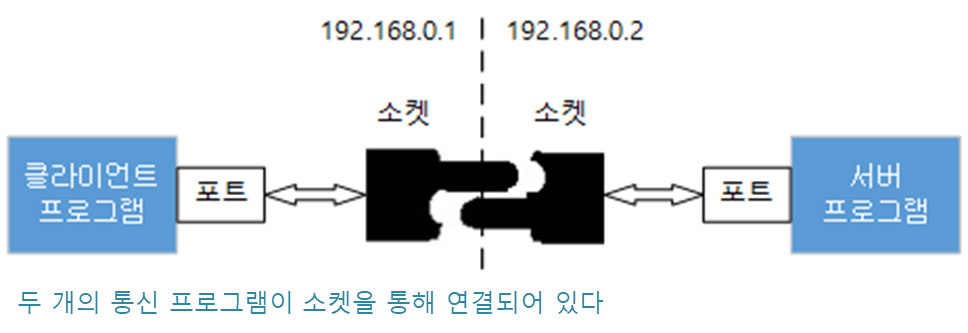

## 네트워크에서 호스트 검색하기

socket 모듈의 메서드를 이용하면 호스트 컴퓨터의 이름이나 주소를 검색할 수 있다
+ socket.gethostname() : 호스트 이름
+ socket.gethostbyname() : 이름으로 호스트 IP 주소
+ socket.gethostbyname_ex() : 이름, 별칭, IP 주소
+ socket.getfqdn() : 정식 도메인 이름
+ socket.gethostbyaddr() : IP주소로 이름 찾기


gethostname()을 이용하여 호스트 이름 검색하기
+ 자신이 사용하고 있는 컴퓨터(호스트) 이름 검색하기

In [ ]:
import socket
host = socket.gethostname() 
print(host)

gethostbyname(host_name)을 이용하여 IP 주소 검색하기
+ 자신이 사용하는 컴퓨터의 IP 주소를 알아본다

In [ ]:
import socket
host = socket.gethostname()
print(socket.gethostbyname(host))

In [ ]:
# 문자열 주소로부터 IP 주소 찾는 프로그램

import socket

#조사할 문자열 주소
HOSTS = [
    'www.uou.ac.kr',
    'www.dongyang.ac.kr',
    'www.python.org',
    'www.naver.com',
    'testname'
]

for host in HOSTS:
    #문자열 주소에 대한 IP 주소 찾기
    try:
        print('{} : {}'.format(host, socket.gethostbyname(host)))
    
    #socket 함수에서 예외가 발생하면 socket.error 예외 발생
    except socket.error as emsg:
        print('{} : {}'.format(host, emsg))

gethostbyname_ex(host_name)를 사용하여 호스트 정보(표준 호스트 이름, 호스트 별칭, IP주소 목록) 알아내기
+ 이 함수는 (hostname, aliaslist, ipaddrlist) 튜플 반환  
  hostname: 표준 호스트 이름  
  aliaslist: 호스트 별칭  
  ipaddrlist: IP 주소 목록  
+ 다음 호스트에 대한 정보를 알아본다

```
HOSTS = [
    'www.uou.ac.kr',
    'www.dongyang.ac.kr',
    'www.python.org',
    'testname', #예외 발생
]
```   
   - socket 함수를 호출했을 때 예외가 발생하면 socket.error 예외가 발생한다

In [ ]:
# 문자열 주소를 이용하여 호스트 정보 검색 프로그램
# socket_gethostbyname_ex.py

import socket
HOSTS = ['www.dongyang.ac.kr', 'pymotw.com','www.python.org','testname']

#문자열 주소에 대한 호스트 정보 검색
for host in HOSTS:
    print(host)
    try:
        name, aliases, addresses = socket.gethostbyname_ex(host)
        print(' Hostname:', name)
        print(' Aliases :', aliases)
        print(' Addresses:', addresses)
    
    #gethostbyname_ex() 함수에서 예외 발생
    except socket.error as msg:
        print('ERROR:', msg)
    print()

getfqdn(domain_name)을 이용하면 호스트의 정식 도메인 이름 검색하기
+ fqdn: full qualified domain name(정식 도메인 이름)
+ 약식 이름(domain_name)으로부터 정식 도메인 이름 검색


In [ ]:
from socket import *
print(getfqdn('www.dongyang.ac.kr'))

In [ ]:
print(getfqdn('www.python.org'))

In [ ]:
print(getfqdn('pymotw.com'))

In [ ]:
print(getfqdn('snu.ac.kr'))

gethostbyaddr('IP address')를 이용하여 호스트 이름 찾기
+ ip 주소로부터 호스트 이름을 찾는다
+ 이 함수는 호스트 정보를 (hostname, aliaslist, ipaddrlist) 튜플로 반환


In [ ]:
# IP 주소를 이용한 호스트 이름 찾기 프로그램

import socket

#'203.249.39.46' 호스트에 대한 정보 검색
hostname, aliases, addresses = socket.gethostbyaddr('203.249.39.46')

print('Hostname :', hostname)
print('Aliases  :', aliases)
print('Addresses:', addresses)

## 주소 유형과 소켓 유형

+ 인테넷은 TCP/IP 프로토콜을 사용한다
+ TCP/IP 프로토콜의 구조(protocol stack)
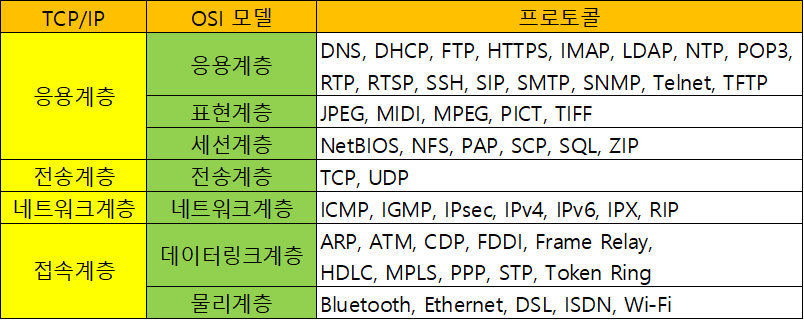  


+ 소켓을 생성하려면 주소 유형과 소켓 유형을 지정해야 한다
   + 주소 유형: 네트워크 계층의 프로토콜
   + 소켓 유형: 전송 계층 프로토콜
   + 소켓은 주소 유형과 소켓 유형에 따라 데이터 전송 방식 결정

### 파이썬의 주소 유형
+ 파이썬이 지원하는 3가지 주소 유형(address family)
+ AF_INET
  + IPv4 주소 유형: 대부분의 인터넷에서 사용
  + 10진 표기법 사용: 127.0.0.1, 203.249.11.15
+ AT_INET6
  + IPv6 인터넷 주소 지정에 사용
  + 128비트 주소 = '2001:db8::1'
+ AF_UNIX
  + Unix 도메인 소켓(UDS)을 위한 주소 유형
  + 프로세스 간 통신(IPC: Inter Process Comm.)을 위해 사용


### 소켓 유형
+ 소켓 유형(socket type)은 데이터를 전송하는 방식을 결정한다
+ SOCK_STREAM
  + 신뢰성있는 전송을 보장하는 TCP 프로토콜 사용
  + HTTP와 같이 대부분의 응용 프로토콜에서 사용
+ SOCK_DGRAM
  + 비신뢰성 전송을 하는 UDP 프로토콜 사용
  + TFTP, NTP 등에서 사용
  + 멀티캐스팅에서 사용

## socket 모듈의 함수들
socket 모듈의 함수 중에서 인터넷 서비스, 포트번호, 전송 프로토콜과 관련된 함수에 대해 알아본다
+ 인터넷 서비스와 서비스에 할당된 포트 번호 찾기
+ 전송 계층 프로토콜의 번호 알아내기
+소켓의 속성 정보 찾기

### 인터넷 서비스 정보 찾기
+ 인터넷에서 응용 프로그램 식별을 위해 IP주소와 포트 번호가 필요하다
  + IP 주소는 호스트를 식별하고 포트 번호는 호스트에서 응용 프로그램을 식별한다
+ 1~65535 사이의 포트 번호를 사용할 수 있으나 인터넷 응용 서비스를 위해 미리 지정된 포트 번호가 있다
+ 인터넷 응용 서비스 이름과 할당된 포트 번호 알아 내기
  + socket.getservbyname()
    + 응용 서비스 --> 포트 번호
  + socket.getservbyport()
    + 포트 번호 --> 응용 서비스
+ 전송 계층 프로토콜 이름으로부터 프로토콜 번호 알아내기
  + socket.getprotobyname()
    + 전송 계층 프로토콜 이름 --> 프로토콜 번호

**getservbyname()을 이용한 인터넷 응용 서비스 포트 번호 확인하기**  
+ getservbyname(servicename[,protocolname])
  + servicename: http, ftp 등과 같은 응용 서비스의 문자열 이름
  + protocolname: tcp, udp과 같은 전송 계층 프로토콜. 서비스 프로토콜에 따라 사용되는 전송 계층 프로토콜은 한 가지만 가능할 수 있다(예: ftp-tcp). 생략하면 서비스에 따라 자동 할당됨. 

In [ ]:
socket.getservbyname('ftp') # ftp 서비스 번호

In [ ]:
socket.getservbyname('http') # http 서비스 번호

In [ ]:
socket.getservbyname('telnet', 'tcp') # telnet 서비스 번호

**getservbyport() 함수를 이용한 인터넷 서비스 이름 확인하기**  
+ getservbyport(port)를 이용하면 포트 번호로부터 표준 인터넷 서비스 이름을 알 수 있다

In [ ]:
# socket_getservbyport.py
# 포트번호로부터 서비스 이름 찾는 프로그램

import socket

#표준 포트 번호에 대한 프로토콜 이름(서비스) 찾기
for port in [80, 443, 21, 70, 25, 143, 993, 110, 995]:
    url = '{}://example.com/'.format(socket.getservbyport(port))
    print(url)

**getprotobyname()을 이용한 프로토콜 번호 확인하기**  
+ getprotobyname(전송계층 프로토콜)을 이용하면 전송 계층 프로토콜 이름에서 프로토콜 번호를 알 수 있다


In [ ]:
socket.getprotobyname('tcp') # tcp 프로토콜 번호

In [ ]:
socket.getprotobyname('udp') # udp 프로토콜 번호

In [ ]:
socket.getprotobyname('icmp') #icmp 프로토콜 번호

### URL로부터 인터넷 서비스 알아내기
+ URL은 인터넷 서비스에 대한 정보를 포함한다
+ urllib.parse 모듈의 urlparse(URL) 함수를 이용하면 URL의 각 요소(속성)를 알 수 있다
  + URL 구조            
  + scheme:://netloc/path;parameters?query#fragment
  
  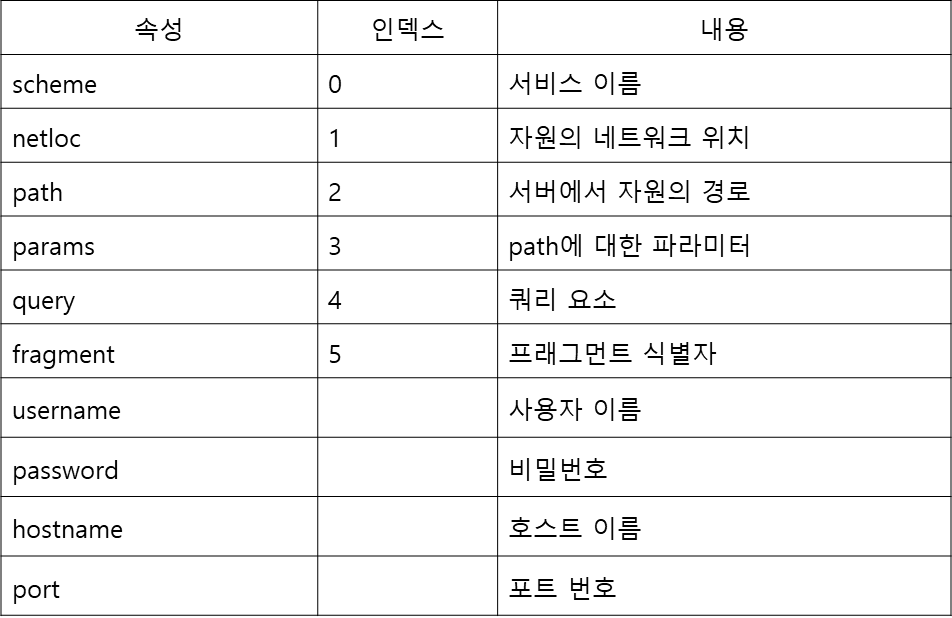

urlparse(URL) 함수는 URL의 6개 요소(속성)를 가진 네임드 튜플을 반환한다

In [ ]:
from urllib.parse import urlparse
o = urlparse('http://www.cwi.nl:80/%7Eguido/Python.html')
print(o)

In [ ]:
o.scheme

In [ ]:
o.port

In [ ]:
o.path

geturl() 메서드를 이용하면 URL 요소를 결합하여 URL을 만들 수 있다

In [ ]:
o.geturl() # 요소를 URL로 결합한다

소켓 속성(socket attribute) 찾기
+ socket에는 여러 가지 속성을 나타내기 위해 속성 문자들이 정의되어 있다
+ getattr(socket, 속성_문자) 내장 함수를 사용하면 socket의 속성 문자에 대한 속성 값을 알 수 있다

In [ ]:
# 소켓의 모든 속성 보기
import socket
#dir(socket)
help(socket.AddressFamily)

In [ ]:
# getattr() 함수를 이용하여 소켓 속성 문자의 속성값 확인하기
getattr(socket, 'AF_INET')

### IP 주소 변환
+ 컴퓨터 언어에 따라 문자열 IP 주소를 표현하는 방법이 다르므로 직접 문자열 주소를 전송하면 상대방은 이해하지 못한다
+ 따라서 송신 컴퓨터에서 문자열 주소를 2진 주소로 변환하여 전송하면 상대방은 2진 주소를 자신의 문자열 주소로 변환하여 사용한다
+ 이를 위해 문자열 주소와 2진 주소를 상호 변환하는 함수가 필요하다
+ 주소 변환 함수
  + inet_aton(문자열_주소)
    + 점 10진 주소를 2진 주소(packed binary) 형태로 변환
  + inet_ntoa(2진_주소)
    + 2진 주소 형태를 점 10진 주소로 변환

In [ ]:
# 문자열 주소와 2진수 주소의 상호 변환 프로그램
#socket_address_packing.py
import binascii
import socket

for string_address in ['203.249.39.46','127.0.0.1']:
    packed =socket.inet_aton(string_address)#문자열 주소를 2진수로 변환
    print('Original:',string_address)
    print('Packed  :',binascii.hexlify(packed)) #2진수를 ASCII로 표현
    print('Unpacked:',socket.inet_ntoa(packed)) #2진수 주소를 문자열로 변환
    print()

### 바이트 순서 변환
+ 컴퓨터에서 멀티 바이트 데이터를 저장하는 순서는 CPU에 따라 다를 수 있다.
  + BigEndian: 최상위 바이트를 가장 낮은 주소에 저장
  + LittleEndian: 최상위 바이트를 가장 높은 주소에 저장
+ 따라서 CPU가 다른 컴퓨터에서 멀티 바이트 데이터를 전송하면 상대방은 잘못 이해할 수 있다
+ 바이트 순서 변환 함수: 호스트 데이터 ⇔ 네트워크 데이터
  + socket.ntohl(x) #long type(4바이트)
  + socket.ntohs(x) #short type(2바이트)
  + socket.htonl(x)
  + socket.htons(x)

In [ ]:
import socket
a=1234
hex(a) #높은 바이트부터 표시

In [ ]:
b=socket.htons(a) #네트워크 바이트 순서
hex(b) #낮은 바이트부터 표시

In [ ]:
c=socket.ntohs(b) #호스트 바이트 순서
hex(c) #높은 바이트부터 표시